In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../data/owid-covid-data.csv')

In [3]:
df['date'] =pd.to_datetime(df['date'])
df.set_index('date', inplace = True)

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


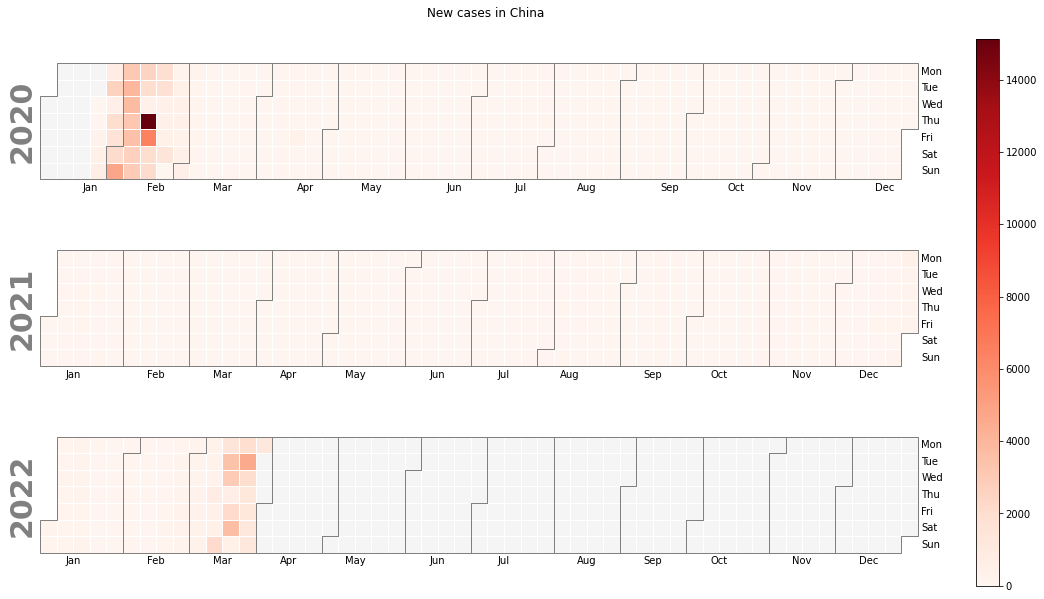

In [4]:
import calplot
country = 'China'
country_df = df[df['location']==country].sort_values(by='date')
ch = calplot.calplot(data = country_df['new_cases'],how = 'sum', cmap = 'Reds', figsize = (16, 8), suptitle = f"New cases in {country}")

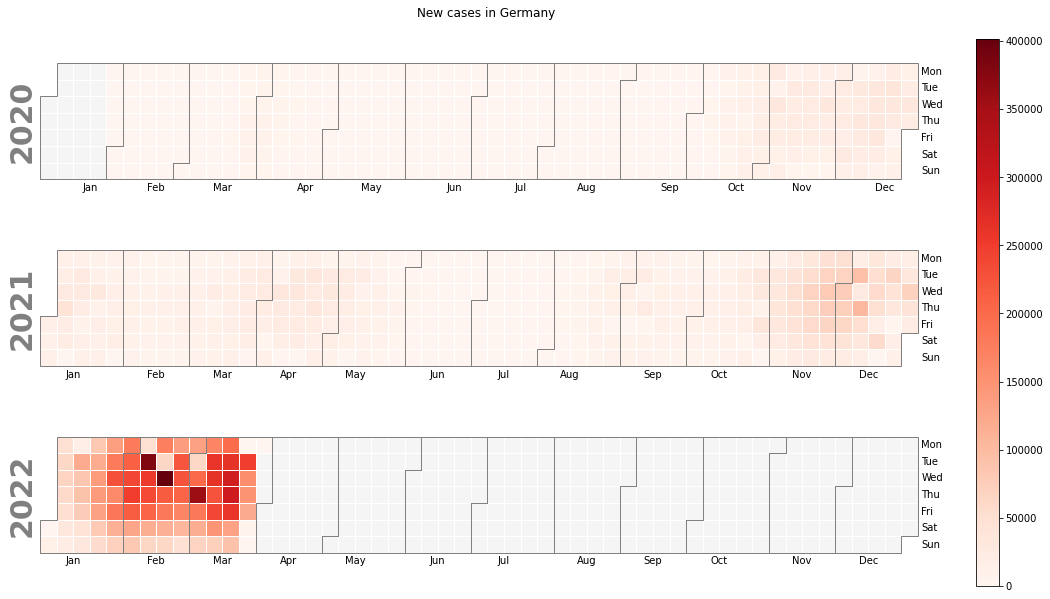

In [5]:
country = 'Germany'
country_df = df[df['location']==country].sort_values(by='date')
ch = calplot.calplot(data = country_df['new_cases'],how = 'sum', cmap = 'Reds', figsize = (16, 8), suptitle = f"New cases in {country}")

In [6]:
from plotly_calplot import calplot
import plotly.io as pio
from plotly.subplots import make_subplots

pio.renderers.default = 'colab'
country = 'Japan'
country_df = df[df['location']==country].sort_values(by='date')
country_df['x'] = country_df.index
fig = calplot(
         country_df,
         x='x',
         y="new_cases",
    colorscale = 'Reds'
)
fig.update_layout(
    title=f'{country} new cases calendar heatmap',
    title_x=0.5,
    font_color="gray",
    title_font_color="Orange",
    margin=dict(l=20, r=20, t=40, b=20),
    title_font_size=15,
    autosize=False,
    width=1200,
    height=600)
fig.show()

In [8]:
from jupyter_dash import JupyterDash
import dash
from dash import dcc, Input, Output,html

country_options = [{'label': i, 'value': i} for i in list(df['location'].unique())]
app = JupyterDash() # use JupyterDash

# 
dpl = dcc.Dropdown(
   options=country_options, 
    value='China',
    id='id_dropdown')

gf = dcc.Graph(figure=fig,id='figure') #
title = html.H1('238 Countries COVID Calendar Heatmap')
app.layout = html.Div([title,dpl,gf])

@app.callback(
    Output("figure", "figure"),
    Input("id_dropdown", "value"),
)
def update_fig(country):
    country_df = df[df['location']==country].sort_values(by='date')
    country_df['x'] = country_df.index
    fig = calplot(
             country_df,
             x='x',
             y="new_cases",
        colorscale = 'Reds'
    )
    fig.update_layout(
        autosize=False,
        width=1200,
        height=600)
    return fig

app.run_server(mode="inline",port=8088)